In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mushrooms = pd.read_csv('../Datasets/mushrooms.csv')

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data preparation

In [5]:
X  = mushrooms.drop(columns='class')
y  = mushrooms['class']

In [6]:
X = pd.get_dummies(X,drop_first=True)

In [7]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## #train-test-split data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.33)

## Gradient-Boosting and GridSearchCV

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is in

In [31]:
gb_model = GradientBoostingClassifier(n_estimators=20,max_depth=1)

In [32]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=20)

In [33]:
pred = gb_model.predict(X_test)

## Model Evaluation

In [34]:
gb_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01988946, 0.        , 0.10783656,
       0.        , 0.        , 0.70494165, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08484159, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01594614, 0.        , 0.        ,
       0.02959624, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
gb_model.n_features_

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


95

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
confusion_matrix(y_test,pred)

array([[1287,  113],
       [  46, 1235]], dtype=int64)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       0.97      0.92      0.94      1400
           p       0.92      0.96      0.94      1281

    accuracy                           0.94      2681
   macro avg       0.94      0.94      0.94      2681
weighted avg       0.94      0.94      0.94      2681



## #GridSearchCV

In [40]:
boost_model = GradientBoostingClassifier()

In [41]:
param_grid = {'n_estimators':[20,40,60,80,100,120],
             'max_depth':[2,3,4]}

In [43]:
grid_model = GridSearchCV(boost_model,param_grid)

In [44]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [20, 40, 60, 80, 100, 120]})

In [45]:
grid_model.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [46]:
prediction = grid_model.predict(X_test)

In [47]:
prediction

array(['p', 'e', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [48]:
confusion_matrix(y_test,prediction)

array([[1400,    0],
       [   2, 1279]], dtype=int64)

In [50]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1400
           p       1.00      1.00      1.00      1281

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [51]:
grid_model.best_estimator_.feature_importances_

array([2.40970287e-16, 2.94136447e-16, 0.00000000e+00, 0.00000000e+00,
       2.55136613e-16, 1.94973755e-03, 1.29510775e-17, 1.39983614e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.26995893e-17,
       2.10872631e-16, 0.00000000e+00, 0.00000000e+00, 3.20979938e-18,
       1.70985015e-03, 6.70496376e-02, 9.16431121e-04, 4.58259985e-02,
       4.25948161e-02, 2.17190176e-04, 5.96202081e-01, 3.83110929e-03,
       0.00000000e+00, 0.00000000e+00, 1.77434006e-16, 2.41877502e-03,
       5.18821648e-02, 0.00000000e+00, 4.20805132e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.84737071e-17, 0.00000000e+00,
       1.90962042e-04, 4.71241995e-04, 9.77664547e-02, 0.00000000e+00,
       9.52210233e-03, 9.23901808e-03, 0.00000000e+00, 1.59068950e-05,
       0.00000000e+00, 0.00000000e+00, 1.40989628e-02, 4.67209531e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [52]:
features = pd.DataFrame(data=grid_model.best_estimator_.feature_importances_,columns=['Features'],index=X.columns)

In [53]:
features

,Features
cap-shape_c,2.409703e-16
cap-shape_f,2.941364e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,2.551366e-16
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,0.000000e+00


In [54]:
feats = features[features['Features']!=0]

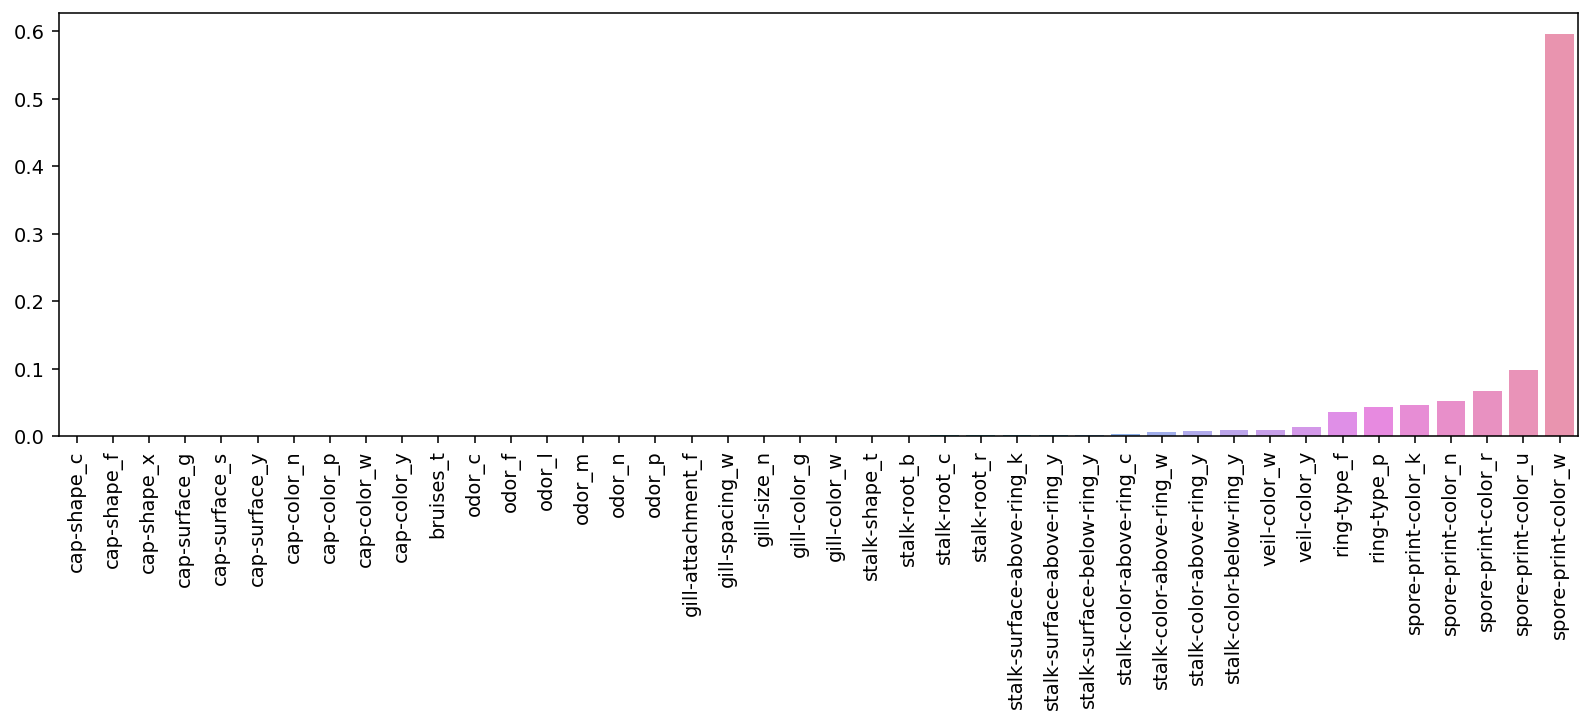

In [60]:
#plot the important features
plt.figure(figsize=(14,4),dpi=140)
sns.barplot(data=feats,x=feats.index,y=feats['Features'].values)
plt.xticks(rotation=90)
plt.show()